In [6]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionUpscalePipeline, DiffusionPipeline, StableDiffusionDepth2ImgPipeline, DPMSolverMultistepScheduler
from diffusers import StableDiffusionImageVariationPipeline,StableDiffusionImageBlendingPipeline

import torch
from PIL import Image
import random
import cv2
import matplotlib.pyplot as plt

In [7]:
'''state = None
current_steps = 25
attn_slicing_enabled = True
modelstr='runwayml/stable-diffusion-v1-5'
pipe = StableDiffusionPipeline.from_pretrained(
      modelstr
    ).to("cuda")
pipe.enable_attention_slicing()'''

'state = None\ncurrent_steps = 25\nattn_slicing_enabled = True\nmodelstr=\'runwayml/stable-diffusion-v1-5\'\npipe = StableDiffusionPipeline.from_pretrained(\n      modelstr\n    ).to("cuda")\npipe.enable_attention_slicing()'

In [8]:
pipe = StableDiffusionImageBlendingPipeline.from_pretrained(
            "lambdalabs/sd-image-variations-diffusers", revision="v2.0"
        )
pipe = pipe.to("cuda")

image_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [18]:
from PIL import Image
img1=Image.open('../data/emojis/barepng/u1f354.png')
img2=Image.open('../data/emojis/barepng/u1f628.png')

In [23]:
Ans=pipe(img1,img2)

  0%|          | 0/50 [00:00<?, ?it/s]

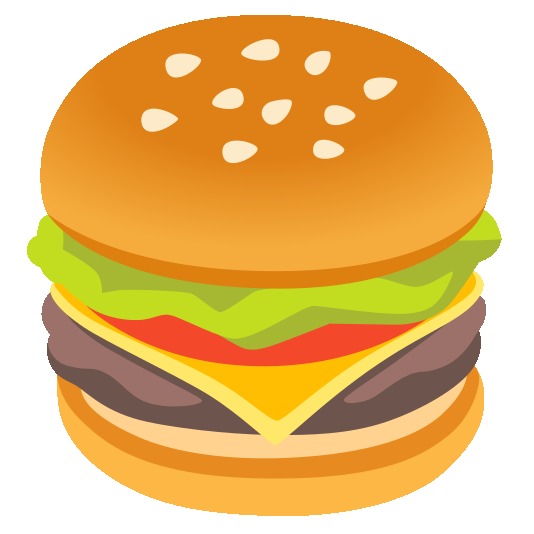

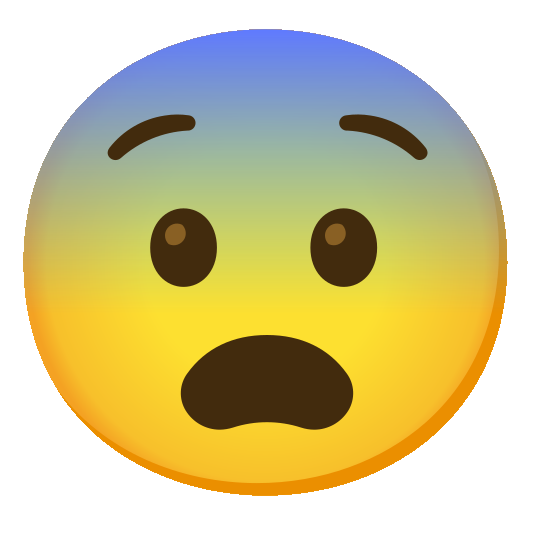

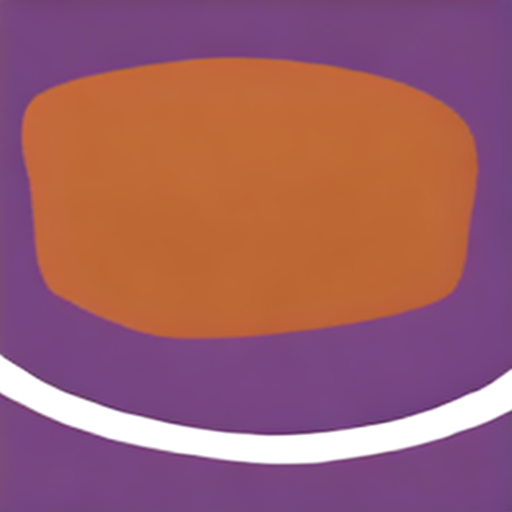

In [24]:
img1.show()
img2.show()
Ans['images'][0].show()

In [12]:
#clip_inps=pipe.feature_extractor(img1)['pixel_values'][0]
#clip_outs=1

In [13]:
num_inference_steps=30
device='cuda'
model_path = "../weights/finetuned_emojis"
pipe.unet.load_attn_procs(model_path)
pipe.text_encoder.load_attn_procs(model_path)

pipe.scheduler.set_timesteps(num_inference_steps, device=device)
#timesteps = pipe.scheduler.timesteps

OSError: We couldn't connect to 'https://huggingface.co' to load this model, couldn't find it in the cached files and it looks like ../weights/finetuned_emojis is not the path to a directory containing a file named pytorch_lora_weights.bin or 
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/diffusers/installation#offline-mode'.

In [ ]:
tokens=pipe.tokenizer('beautiful sunset',return_tensors="pt")
embeds=pipe.text_encoder(tokens['input_ids'].cuda(),attention_mask=tokens['attention_mask'].cuda())[0]
negembeds=None


In [ ]:
Ans=pipe('beautiful sunset emoji')

  0%|          | 0/50 [00:00<?, ?it/s]

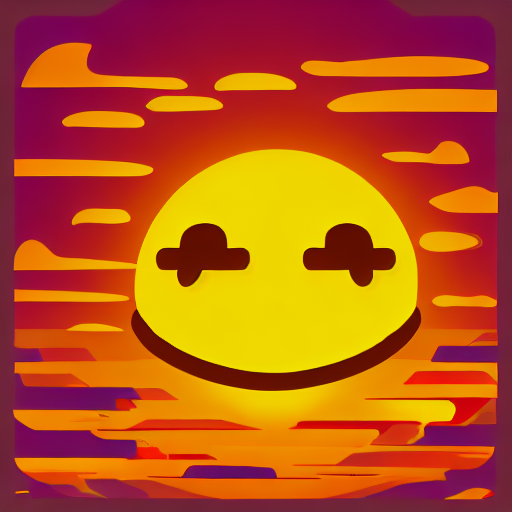

In [ ]:
Ans['images'][0]

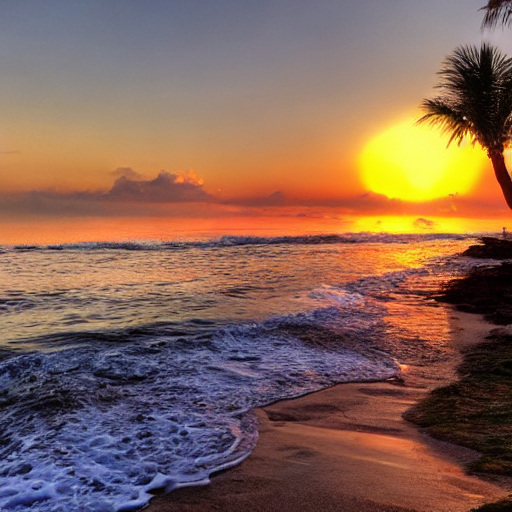

In [ ]:
Ans['images'][0]

In [ ]:
with torch.no_grad():
    enc1=vae.encode(imgtorch1.half()/255).latent_dist
    enc2=vae.encode(imgtorch2.half()/255).latent_dist
    #enc=enc1+enc2
    sample=enc1.mode()/2+enc2.mode()/2
    dec=vae.decode(sample).sample
    imgdec=dec[0].permute(1,2,0).detach().cpu().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


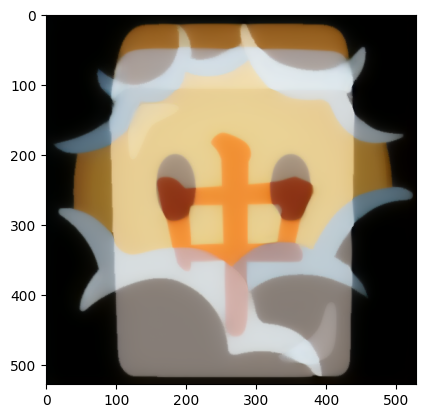

In [ ]:
plt.imshow(imgdec.astype(float))